In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import eigsh
from scipy.sparse import identity as sid
%matplotlib inline

In [4]:
def trap_method(a,b,yvals):
    Nm1 = yvals.size    
    return (b-a)/(Nm1) * np.sum(yvals)

**Problem 1**: (20pts) In quantum mechanics, it is really common to see boundary value problems of the form 

$$
-\epsilon\frac{d^{2}y}{dx^2} + \cos(\pi x)y = Ey, ~ y(-1) = y(1).
$$

where $0\leq \epsilon \ll 1$, i.e. we let $\epsilon$ be a small positive parameter.  $E\geq 0$ is the _energy_ of a particle trapped in an oscillating potential well $V(x) = \cos(\pi x)$, which is formed in crystal lattices of metals.  We likewise use _periodic-boundary conditions_ by setting 

$$
y(-1) = y(1).
$$

We desribe the probability of a particle being in the interval $[-1,a]$, $a<1$ via the formula

$$
P(-1\leq x \leq a) = \int_{-1}^{a} \tilde{y}(x) ~dx, ~ \tilde{y}(x) = \frac{y^{2}(x)}{\int_{-1}^{1}y^{2}(x)~dx}
$$

1a) (10pts) Using second-order centered-difference approximations and spdiags, write code which discretizes the operator $-\epsilon\frac{d^{2}y}{dx^2} + \cos(\pi x)y\approx A{\bf y}$, where ${\bf y}=\left(y_{1} ~y_{2}\cdots y_{N-1}\right)^{T}$, $y_{j}=y(x_{j})$.  Note, the periodic boundary conditions are implemented as 

$$
y_{0} = y_{N-1}, ~ y_{N} = y_{1}.
$$

This means that we have entries in the very top and the very bottom corners of our sparse matrix.  

1b) (5pts) You have now formed a discrete eigenvalue problem $A{\bf y} = E{\bf y}$.  Using the code below find the first 10 eigenvalues of the discretized equations.  For $\epsilon=1,.1,.01$ and $.001$, describe via a well designed plot how the first ten energy levels change as you decrease $\epsilon$.  

1c) (5pts) For $\epsilon=.01$, compare the associated probability distributions $\tilde{y}(x)$ for the first three energy levels.  How do the likelihoods of where a particle would be found change with changing energy?  Note, you'll need to use the Trapezoid Method (code included above) to compute the integrals used in defining $\tilde{y}(x)$.

In [7]:
def eval_find(xvals,epvl):
    # xvals is your mesh.  epvl is your epsilon value.
    Np1 = xvals.size # this is N+1
    dx = xvals[1] - xvals[0]
    idx2 = -epvl/dx**2.
    
    diag = -2.*idx2*np.ones(Np1-2) + np.cos(np.pi*xvals[1:-1])
    odiagp1 = idx2*np.ones(Np1-2)
    odiagn1 = idx2*np.ones(Np1-2)
    odiagNp = idx2*np.ones(Np1-2)
    odiagNn = idx2*np.ones(Np1-2)
        
    # if you've done everything correctly, this should just work from here on out
    data = np.array([odiagNn, odiagn1, diag, odiagp1, odiagNp])    
    dvals = np.array([-(Np1-3),-1,0,1,(Np1-3)])  
    Amat = spdiags(data, dvals, Np1-2, Np1-2)
    energy_values, ysols = eigsh(Amat,10,which='SM',mode='buckling') # return energies and corresponding y(x_j) solutions
   
    return energy_values, ysols

In [26]:
Nvls = 1000
xvals = np.linspace(-1.,1.,Nvls+1)

Text(0, 0.5, '$E_{n}$')

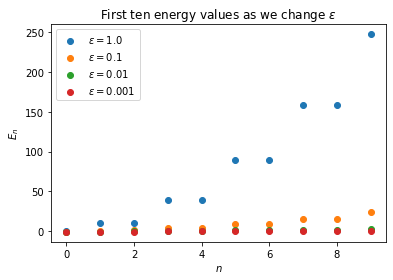

In [28]:
# This is just meant to get you started.  You'll need to think more about how to generate all the necessary plots.  
epvls = [1., .1, .01, .001]
for epvl in epvls:
    energy_values, ysols = eval_find(xvals,epvl)
    plt.scatter(np.arange(energy_values.size),energy_values[:],label=r"$\epsilon=$"+str(epvl))

plt.legend()
plt.title(r"First ten energy values as we change $\epsilon$" )
plt.xlabel("$n$")
plt.ylabel("$E_{n}$") 

In [ ]:
# This is just meant to get you started.  You'll need to think more about how to generate all the necessary plots.  
epvls = [1., .1, .01, .001]
for epvl in epvls:
    energy_values, ysols = eval_find(xvals,epvl)
    plt.scatter(np.arange(energy_values.size),energy_values[:],label=r"$\epsilon=$"+str(epvl))

plt.legend()
plt.title(r"First ten energy values as we change $\epsilon$" )
plt.xlabel("$n$")
plt.ylabel("$E_{n}$") 

Clearly, as we decrease $\epsilon$, the magnitude of the energy levels decreases dramatically.  We also see that it is difficult to represent all of the information clearly on one graph.  So, let's see what happens if we break this plot up a bit.  To wit, let's look at what happens for just $\epsilon=1.$ and $\epsilon=.1$ and then $\epsilon=.01$ and $\epsilon=.001$.

Text(0, 0.5, '$E_{n}$')

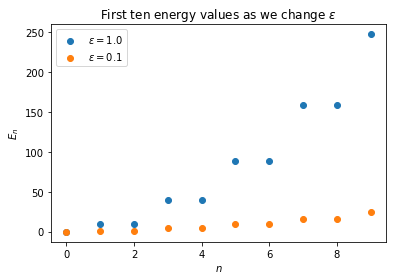

In [32]:
epvls = [1., .1]
for epvl in epvls:
    energy_values, ysols = eval_find(xvals,epvl)
    plt.scatter(np.arange(energy_values.size),energy_values[:],label=r"$\epsilon=$"+str(epvl))

plt.legend()
plt.title(r"First ten energy values as we change $\epsilon$" )
plt.xlabel("$n$")
plt.ylabel("$E_{n}$") 

Text(0, 0.5, '$E_{n}$')

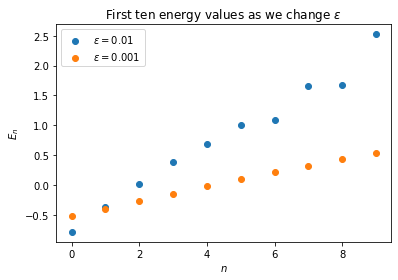

In [31]:
epvls = [.01, .001]
for epvl in epvls:
    energy_values, ysols = eval_find(xvals,epvl)
    plt.scatter(np.arange(energy_values.size),energy_values[:],label=r"$\epsilon=$"+str(epvl))

plt.legend()
plt.title(r"First ten energy values as we change $\epsilon$" )
plt.xlabel("$n$")
plt.ylabel("$E_{n}$") 

Now we see more clearly that for larger $\epsilon$ that the energy levels are always positive and increase with increasing $\epsilon$.  This is not the case for the smaller $\epsilon$ values which introduce negative energy levels and also allow for crossings as we decrease $\epsilon$.  

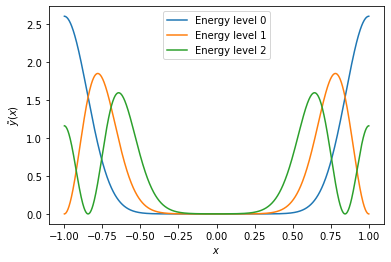

In [36]:
energy_values, ysols = eval_find(xvals,.01)
for jj in range(3):
    ycur = ysols[:,jj]**2.
    intycur = trap_method(-1,1,ycur)
    plt.plot(xvals[1:-1],ycur/intycur,label=r"Energy level " + str(jj)) 
plt.xlabel(r"$x$")
plt.ylabel(r"$\tilde{y}(x)$")
plt.legend()

Now looking at $\tilde{y}(x)$ for the first three energy levels when $\epsilon=.01$, we see striking patterns.  For the lowest energy level, we see that the highest probability is for a particle to be at the edges of the interval (which is really the same point due to the periodic boundary conditions).  Thus, as the energy increases, we see that the particle is more likely to be more than just at one point, though the overall probability of being in any one place decreases.  Thus higher energies create greater uncertainity in location.  

**Problem 2**: 10 pts - For non-negative integer $n$, and $x\in[-1,1]$, define the function $T_{n}(x)=\cos(n\cos^{-1}(x))$.  
<ol>
        <li> (1pt) Show that $T_{0}(x)=1$
        <li> (1pt) Show that $T_{1}(x)=x$
        <li> (1pt) Show that $T_{2}(x)=2x^{2}-1$
        <li> (1pt) Show that $\sin(\cos^{-1}(x))=\sqrt{1-x^{2}}$            
        <li> (3pts) Using trignometric addition formulas, show that $T_{n+1}(x)=2xT_{n}(x) - T_{n-1}(x)$
        <li> (2pts) Using induction then, show that $T_{n}(x)$ is an $n^{th}$-degree polynomial.
</ol>

For this reason, we call $T_{n}(x)$ the _Chebyshev_ polynomials.  

**Solutions**:
<ol>
    <li> $\cos(0) = 1$
    <li> $\cos(\cos^{-1}(x))=x$
    <li> $\cos(2\cos^{-1}(x)) = 2\cos^{2}(\cos^{-1}(x)) - 1 = 2x^{2}-1$
    <li> $\sin(\cos^{-1}(x)) = \sqrt{1-\cos^{2}(\cos^{-1}(x))} = \sqrt{1-x^{2}}$
    <li> So using $\cos(A\pm B)=\cos(A)\cos(B)\mp\sin(A)\sin(B)$, we have 
        \begin{align*}
        T_{n+1}(x) = & \cos((n+1)\cos^{-1}(x))\\
                    = & x T_{n}(x) - \sin(n\cos^{-1}(x))\sqrt{1-x^{2}}
        \end{align*}
        Likewise, we then see that 
        \begin{align*}
        T_{n-1}(x) = & \cos((n-1)\cos^{-1}(x))\\
                    = & x T_{n}(x) + \sin(n\cos^{-1}(x))\sqrt{1-x^{2}}
        \end{align*}
        Solving for $\sin(n\cos^{-1}(x))\sqrt{1-x^{2}}$, we see 
        $$
        T_{n+1}(x) = 2xT_{n}(x) - T_{n-1}(x)
        $$
    <li> So if $T_{n}$ and $T_{n-1}$ are polynomials, our formula $T_{n+1}(x)=2xT_{n}(x)-T_{n-1}$ guarantees that $T_{n+1}(x)$ must be polynomial since it is a product and difference of them.  Given that $T_{0}$ and $T_{1}$ are polynomials, we have the proof by induction.      
</ol>

**Problem 3**: 10 pts - For the Chebyshev points 

$$
x_{j} = \cos\left(\frac{2j+1}{2n+2}\pi\right), ~ j=0,\cdots,n
$$

<ol>
    <li> (3pts) Show that $T_{n+1}(x_{j})=0$.  
    <li> (3pt) Using the Fundamental Theorem of Algebra, show that 
        $$
        T_{n+1}(x) = c \prod_{j=0}^{n}(x-x_{j})
        $$
        where $c$ is some constant.  
    <li> (4pts) For the affiliated interpolating polynomial, say $p_{n}(x)$ where
        $$
        p_{n}(x) = \sum_{j=0}^{n}f_{j}L_{j}(x).
        $$
        Show using l'Hopital's rule and the fact that $L_{j}(x_{j})=1$ that  
        $$
        L_{j}(x) = \frac{T_{n+1}(x)}{(x-x_{j})T'_{n+1}(x_{j})}
        $$     
</ol>

**Solutions**:
<ol>
    <li> $\cos\left((n+1)\cos^{-1}\left(\cos\left(\frac{2j+1}{2n+2}\pi\right) \right)\right) = \cos\left(\left(j +  \frac{1}{2}\right)\pi\right)= 0$
    <li> Since we know that $T_{n+1}(x)$ is an (n+1) degree polynomial, by the Fundamental Theorem of Algebra, it has $n+1$ roots, and it can be factored by its roots.  Given that we know the roots from Problem 3.1, we therefore must have 
        $$
        T_{n+1}(x) = c\prod_{j=0}^{n}(x-x_{j})
        $$
        where $c$ is some real constant.  
    <li> So $L_{j}(x)$ is an $n^{th}$-degree polynomial constructed so that it has roots $\left\{x_{l}\right\}_{l\neq j}$.  Thus the polynomials $L_{j}(x)$ and $T_{n+1}(x)/(x-x_{j})$ are $n^{th}$-degree polynomials with the same roots.  Therefore there must be some constant $C$ such that 
        $$
        L_{j}(x)=\frac{C ~T_{n+1}(x)}{x-x_{j}}
        $$
        Given that $L_{j}(x_{j})=1$, we must have 
        $$
        \lim_{x\rightarrow x_{j}}\frac{C~T_{n+1}(x)}{x-x_{j}} = 1.
        $$
        Using l'Hopital's Rule, we then readily see that 
        $$
        C = \frac{1}{T'_{n+1}(x_{j})}
        $$
</ol>

**Problem 4**: 15 pts - Given $T_{n+1}(x)=\cos((n+1)\cos^{-1}(x))$:
<ol>
    <li> Show that (2pts)
        $$
        \frac{d}{dx}T_{n+1}(x) = (n+1)\frac{\sin((n+1)\cos^{-1}(x))}{\sqrt{1-x^{2}}}
        $$
    <li> Show then that (2pts)
        $$T'_{n+1}(x_{k}) = \frac{(n+1)(-1)^{k}}{\sqrt{1-x_{k}^{2}}}$$
    <li> Thus show that for $k\neq j$ that (2pts)
        $$L_{j}'(x_{k}) =   \frac{(-1)^{k+j}}{x_{k}-x_{j}}\sqrt{\frac{1-x_{j}^{2}}{1-x_{k}^{2}}}$$    
    <li> (Extra Credit +3, all or nothing) Using l'Hopital's rule, show (this can be quite tricky) that 
        $$
        \lim_{x\rightarrow x_{j}}L'_{j}(x) = \frac{T''(x_{j})}{2T'(x_{j})}
        $$
    <li> Thus show that (2pts)
        $$
        L'_{j}(x_{j}) = \frac{x_{j}}{2(1-x_{j}^{2})}
        $$
</ol>

Thus we now have the formula 
$$
L_{j}'(x_{k}) = \left\{
\begin{array}{lr}
\frac{(-1)^{k+j}}{x_{k}-x_{j}}\sqrt{\frac{1-x_{j}^{2}}{1-x_{k}^{2}}} & k\neq j\\
& \\
\frac{x_{j}}{2(1-x_{j}^{2})} & k=j
\end{array}
\right.
$$

so for given function $f(x)$, we can approximate $f'(x_{k})$ via the formula
$$
f'(x_{k})\approx p_{n}'(x_{k}) = \sum_{j=0}^{n}L'_{j}(x_{k})f_{j},
$$
which written in matrix/vector form is 
$$
\begin{pmatrix}f'(x_{0})\\f'(x_{1})\\\vdots\\f'(x_{n})\end{pmatrix} \approx {\bf D} \begin{pmatrix}f_{0}\\f_{1}\\\vdots\\f_{n}\end{pmatrix}, ~ {\bf D}_{kj} = L'_{j}(x_{k}).
$$
The code below builds ${\bf D}$ for you.  For the remainder of this problem, choose a test function $f(x)$, explain your choice, and then explore the error in using ${\bf D}$ to approximate the derivative of $f(x)$ for several choices of $N$.  Explain any trends or other features you observe in your experiments.  (7 pts)

**Solutions**:
The only tricky bit through here is the Extra Credit.  To show it, we start from 
\begin{align*}
L'_{j}(x) = & \frac{T_{n+1}'(x)}{T_{n+1}'(x_{j})(x-x_{j})} - \frac{T_{n+1}(x)}{(x-x_{j})^{2}T'_{n+1}(x_{j})}\\
= & \frac{T_{n+1}'(x)}{T_{n+1}'(x_{j})(x-x_{j})} - \frac{L_{j}(x)}{x-x_{j}}
\end{align*}
If we let $x\rightarrow x_{j}$ and use l'Hopital's Rule, we see 
$$
\lim_{x\rightarrow x_{j}}L_{j}'(x) = \frac{T''_{n+1}(x_{j})}{T_{n+1}'(x_{j})} - \lim_{x\rightarrow x_{j}}L_{j}'(x)
$$
and thus
$$
\lim_{x\rightarrow x_{j}}L_{j}'(x) = \frac{T''_{n+1}(x_{j})}{2T_{n+1}'(x_{j})}
$$


In [37]:
def build_dmat(cheb_pts):
    Np1 = cheb_pts.size
    Dmat = np.zeros((Np1,Np1))
    cvec = 1. - cheb_pts**2.
    Dmat += np.diag(cheb_pts/(2.*cvec))
    sclmat = np.sqrt(np.tile(1./cvec.reshape(-1,1),(1,Np1))*np.tile(cvec,(Np1,1)))
    for kk in range(Np1):
        for jj in range(kk+1, Np1):            
            dif = 1./(cheb_pts[kk]-cheb_pts[jj])
            Dmat[kk,jj] = (-1.)**(jj+kk) * dif * sclmat[kk,jj] 
            Dmat[jj,kk] = (-1.)**(jj+kk+1) * dif * sclmat[jj,kk]
    return Dmat

In [52]:
ffun = lambda x: 1./(1.+x**2.) # pick a function to study and explain why you chose it 
dftrue = lambda x: -2.*x/(1.+x**2.)**2. # make sure you find the exact derivative of f 

I chose $f(x)=1/(1+x^{2})$ since this is a classic example and one that we have studied in detail throughout the class.  We now look at our approximation to $f'(x)$ for $n=10$, $20$, and $40$.  

In [53]:
def cheb_diff(ffun, dftrue, Npts):
    cheb_pts = np.cos( (2*np.arange(Npts+1)+1)/(2*Npts+2)*np.pi )
    Dmat = build_dmat(cheb_pts)
    fvec = ffun(cheb_pts).reshape(-1, 1)
    dfapprox = Dmat @ fvec
    dftrue_vec = dftrue(cheb_pts).reshape(-1,1)
    plt.plot(cheb_pts,np.log10(np.abs( dfapprox - dftrue_vec )),color='k')
    plt.title("Log of Error in Derivative Approximation for $n=$ " + str(Npts))
    plt.xlabel(r"$x$")
    plt.ylabel(r"$\log_{10}Error(x)$")

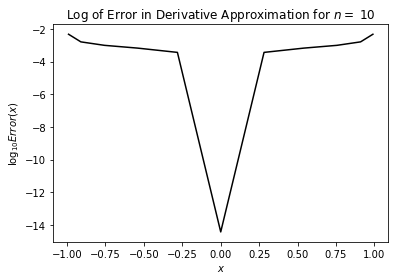

In [54]:
Npts = 10
cheb_diff(ffun, dftrue, Npts)

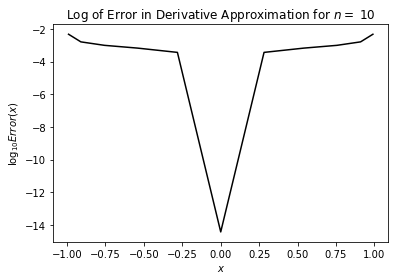

In [55]:
Npts = 10
cheb_diff(ffun, dftrue, Npts)

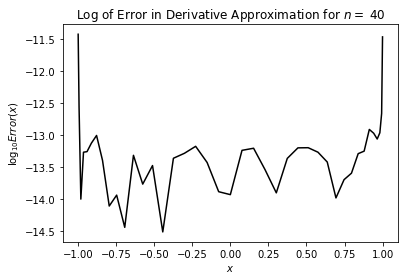

In [56]:
Npts = 40
cheb_diff(ffun, dftrue, Npts)

So as we see, by increasing $n$, we radically improve the quality of our approximation.  In particular, while there is a significant jump in improvement from $n=10$ to $n=20$, there is a strong difference in the quality of the approximation at the center of the interval vs the edges.  This is all but erased except at the final points in our approximation domain for $n=40$.  Moreover, by $n=40$, we are very close to machine precision accuracy throughout the domain, which is a vastly superior result than what we would expect using finite differencing as in Problem 1.  

In [57]:
ffun = lambda x: np.sin(x) # pick a function to study and explain why you chose it 
dftrue = lambda x: np.cos(x) # make sure you find the exact derivative of f 

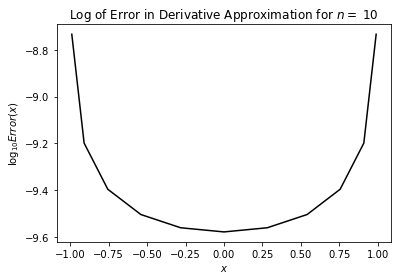

In [58]:
Npts = 10
cheb_diff(ffun, dftrue, Npts)

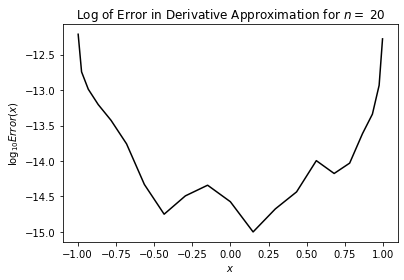

In [59]:
Npts = 20
cheb_diff(ffun, dftrue, Npts)